In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#linearly space training points
x = torch.linspace(0,799,800)

In [3]:
y = torch.sin(x*2*3.1416/40)

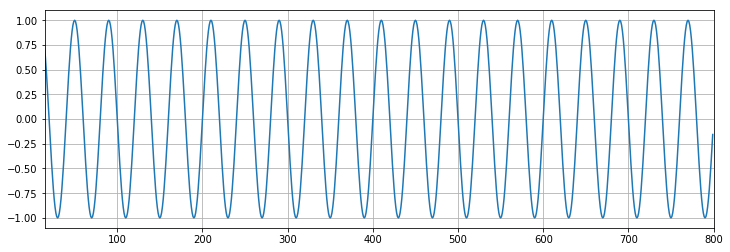

In [6]:
plt.figure(figsize=(12,4))
plt.xlim(15,801)
plt.grid(True)
plt.plot(y.numpy());

In [8]:
test_size = 40

train_set = y[:-test_size]
test_set = y[-test_size:]

In [9]:
def input_data(seq,ws):  # seq = training sequence points, ws = window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [10]:
window_size = 40 #needs to domain knowledge to understand

#creating the training dataset of sequence/label tuples:
train_data = input_data(train_set,window_size)

In [11]:
len(train_data) # this should equal 760-40

720

In [14]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

In [15]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1): #input_size = number of y values per time stamp, hidden_size = arbitrary, out_size = number of elemets in label
        super().__init__()
        self.hidden_size = hidden_size
        
        # adding an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # adding a fully-connected layer:
        self.linear = nn.Linear(hidden_size,out_size)
        
        # initializing h0 and c0:
        self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]   # we only care about the last prediction

In [16]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) #SGD works better than Adam in RNN

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [17]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')
    
count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651
